<a href="https://colab.research.google.com/github/yassersakr88/Airbnb-New-User-Bookings/blob/main/8_airbnb_recruiting_new_user_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis for Airbnb New User Bookings datasets

### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

### loading datasets

In [3]:
age_gender_bkts = pd.read_csv('age_gender_bkts.csv')
countries = pd.read_csv('countries.csv')
#sessions = pd.read_csv('sessions.csv')
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')

### Data Wrangling

#### 1. Age-Gender Dataset

In [4]:
age_gender_df = age_gender_bkts.copy()
age_gender_df.head()

age_bucket country_destination gender  population_in_thousands    year
0       100+                  AU   male                      1.0  2015.0
1      95-99                  AU   male                      9.0  2015.0
2      90-94                  AU   male                     47.0  2015.0
3      85-89                  AU   male                    118.0  2015.0
4      80-84                  AU   male                    199.0  2015.0

In [5]:
age_gender_df['country_destination'].unique()

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US'],
      dtype=object)

In [6]:
us_age_gender_df = age_gender_df[age_gender_df['country_destination'] == 'US']#.reset_index().drop('index', axis=1)
us_age_gender_df.head()

age_bucket country_destination  gender  population_in_thousands    year
378      90-94                  US  female                   1193.0  2015.0
379      75-79                  US    male                   3641.0  2015.0
380      70-74                  US    male                   5278.0  2015.0
381      65-69                  US    male                   7561.0  2015.0
382      60-64                  US    male                   9217.0  2015.0

#### 2. Countries Dataset

In [7]:
countries.head()

country_destination  lat_destination  lng_destination  distance_km  \
0                  AU           -26.85           133.28     15297.74   
1                  CA            62.39           -96.82      2828.13   
2                  DE            51.17            10.45      7879.57   
3                  ES            39.90            -2.49      7730.72   
4                  FR            46.23             2.21      7682.94   

   destination_km2 destination_language   language_levenshtein_distance  
0         7.74e+06                   eng                           0.00  
1         9.98e+06                   eng                           0.00  
2         3.57e+05                   deu                          72.61  
3         5.05e+05                   spa                          92.25  
4         6.44e+05                   fra                          92.06

#### 3. Sessions Dataset

In [8]:
#sessions.head()

#### 4. Train Users Dataset

In [9]:
train_users_df = train_users.copy()

In [10]:
train_users_df.head()

id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [11]:
train_users_df.shape

(213451, 16)

### Exploring the dataset

In [12]:
train_users_df.head()

id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [13]:
train_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

### Check for duplicates

In [14]:
train_users_df.duplicated().sum()

0

dataset has no duplicates

### Exploring the descriptive statistics of the variables

In [15]:
train_users_df.describe(include='all')

id date_account_created  timestamp_first_active  \
count       213451               213451                2.13e+05   
unique      213451                 1634                     NaN   
top     gxn3p5htnn           2014-05-13                     NaN   
freq             1                  674                     NaN   
mean           NaN                  NaN                2.01e+13   
std            NaN                  NaN                9.25e+09   
min            NaN                  NaN                2.01e+13   
25%            NaN                  NaN                2.01e+13   
50%            NaN                  NaN                2.01e+13   
75%            NaN                  NaN                2.01e+13   
max            NaN                  NaN                2.01e+13   

       date_first_booking     gender        age signup_method  signup_flow  \
count               88908     213451  125461.00        213451    213451.00   
unique               1976          4        NaN             3          NaN   
top            2014-05-22  -unknown-        NaN         basic          NaN   
freq                  248      95688        NaN        152897          NaN   
mean                  NaN        NaN      49.67           NaN         3.27   
std                   NaN        NaN     155.67           NaN         7.64   
min                   NaN        NaN       1.00           NaN         0.00   
25%                   NaN        NaN      28.00           NaN         0.00   
50%                   NaN        NaN      34.00           NaN         0.00   
75%                   NaN        NaN      43.00           NaN         0.00   
max                   NaN        NaN    2014.00           NaN        25.00   

       language affiliate_channel affiliate_provider first_affiliate_tracked  \
count    213451            213451             213451                  207386   
unique       25                 8                 18                       7   
top          en            direct             direct               untracked   
freq     206314            137727             137426                  109232   
mean        NaN               NaN                NaN                     NaN   
std         NaN               NaN                NaN                     NaN   
min         NaN               NaN                NaN                     NaN   
25%         NaN               NaN                NaN                     NaN   
50%         NaN               NaN                NaN                     NaN   
75%         NaN               NaN                NaN                     NaN   
max         NaN               NaN                NaN                     NaN   

       signup_app first_device_type first_browser country_destination  
count      213451            213451        213451              213451  
unique          4                 9            52                  12  
top           Web       Mac Desktop        Chrome                 NDF  
freq       182717             89600         63845              124543  
mean          NaN               NaN           NaN                 NaN  
std           NaN               NaN           NaN                 NaN  
min           NaN               NaN           NaN                 NaN  
25%           NaN               NaN           NaN                 NaN  
50%           NaN               NaN           NaN                 NaN  
75%           NaN               NaN           NaN                 NaN  
max           NaN               NaN           NaN                 NaN

In [16]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.4/357.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=8e5e629cfd10885ef410e46343c09a6434687c68be1766503cae7e47558d039c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [17]:
profile = ProfileReport(train_users_df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Checking for missing values

In [18]:
train_users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## Exploring variables

In [19]:
train_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

### 1. Numerical variables

In [20]:
train_users_df.select_dtypes(exclude='object').columns

Index(['timestamp_first_active', 'age', 'signup_flow'], dtype='object')

#### date_account_created, date_first_booking and timestamp_first_active

Convert `date_account_created`, `date_first_booking` and `timestamp_first_active` from `object` to `datetime` format

In [21]:
train_users_df['date_account_created'] = pd.to_datetime(train_users_df['date_account_created'], format='%Y-%m-%d')
train_users_df['date_first_booking'] = pd.to_datetime(train_users_df['date_first_booking'], format='%Y-%m-%d')
train_users_df['timestamp_first_active'] = pd.to_datetime(train_users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [22]:
train_users_df.select_dtypes(exclude='object').columns

Index(['date_account_created', 'timestamp_first_active', 'date_first_booking',
       'age', 'signup_flow'],
      dtype='object')

Extract `day`, `month` from `date_first_booking`

In [23]:
train_users_df['day_first_booking'] = train_users_df['date_first_booking'].dt.day_name()
train_users_df['day_first_booking'].unique()

array([nan, 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday',
       'Friday', 'Sunday'], dtype=object)

<Axes: xlabel='day_first_booking', ylabel='count'>

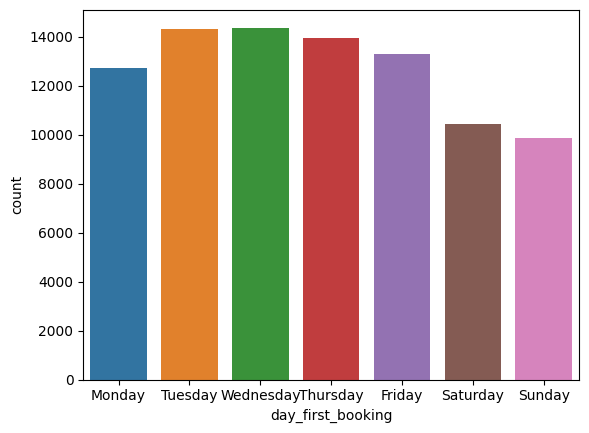

In [24]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x = train_users_df['day_first_booking'], order = day_order)

In [25]:
train_users_df['month_first_booking'] = train_users_df['date_first_booking'].dt.month_name()
train_users_df['month_first_booking'].unique()

array([nan, 'August', 'September', 'February', 'January', 'July',
       'December', 'March', 'June', 'April', 'May', 'October', 'November'],
      dtype=object)

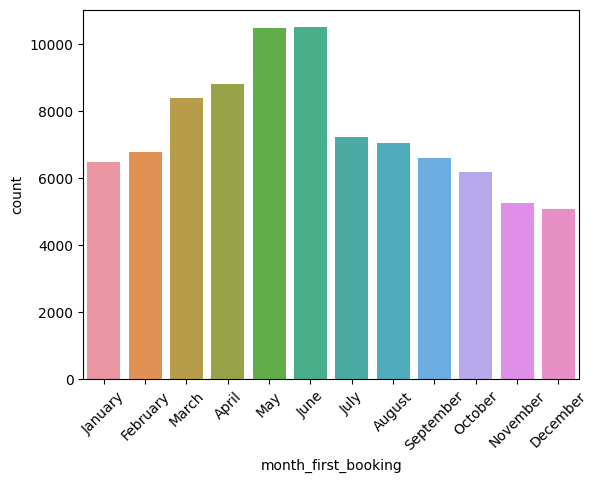

In [26]:
month_order = ['January', 'February',  'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x = train_users_df['month_first_booking'], order = month_order)
plt.xticks(rotation=45);

Extract `hour` from `timestamp_first_active` to check when airbnb member are active around day time

In [27]:
train_users_df['hour_first_active'] = train_users_df['timestamp_first_active'].dt.hour
train_users_df['hour_first_active'].unique()

array([ 4, 17, 23,  6, 21,  1, 19,  0,  2,  5,  8, 20, 22, 15,  3, 13,  7,
       18,  9, 10, 16, 12, 11, 14])

<Axes: xlabel='hour_first_active', ylabel='count'>

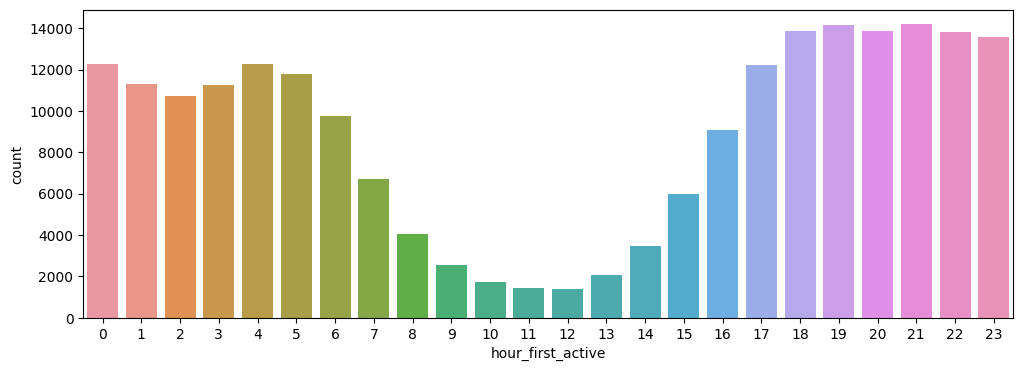

In [28]:
plt.figure(figsize=(12,4))
sns.countplot(x = train_users_df['hour_first_active'])

#### Age

In [29]:
train_users_df['age'].describe()

count    125461.00
mean         49.67
std         155.67
min           1.00
25%          28.00
50%          34.00
75%          43.00
max        2014.00
Name: age, dtype: float64

As we see from descriptive statistics of the **`age`**, the max value is **`2014`** which I think is wrong input (birth date instaed of age) so I will try to corret these values to avoid outliers.

In [30]:
for i in range(train_users_df.shape[0]):
    if train_users_df.loc[i, 'age'] > 150:
        train_users_df.loc[i, 'age'] = train_users_df.loc[i, 'date_account_created'].year - train_users_df.loc[i, 'age']

In [31]:
train_users_df['age'][train_users_df['age'] > 150].unique()

array([], dtype=float64)

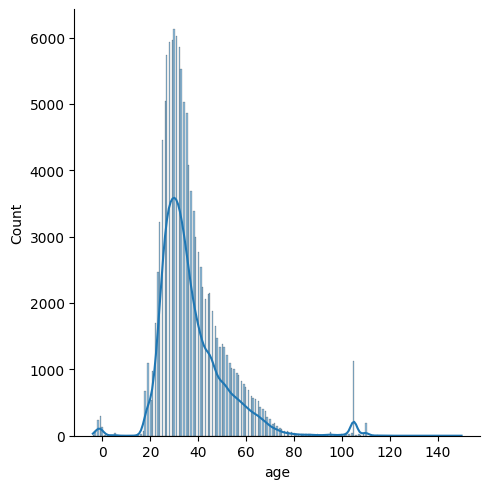

In [32]:
sns.displot(train_users_df['age'], kde=True)

In [33]:
train_users_df['age'].describe()

count    125461.00
mean         37.19
std          14.25
min          -4.00
25%          28.00
50%          34.00
75%          43.00
max         150.00
Name: age, dtype: float64

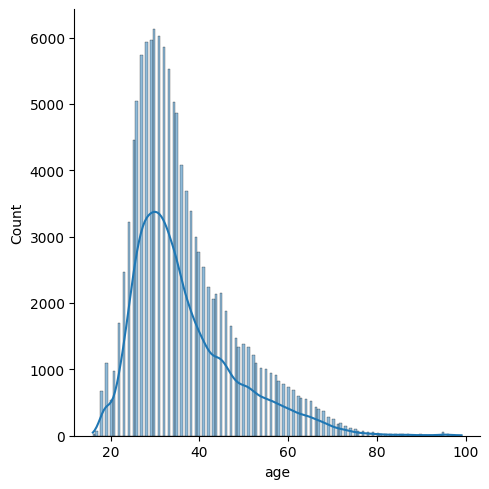

In [34]:
train_users_df.loc[train_users_df['age'] >= 100, 'age'] = np.nan
train_users_df.loc[train_users_df['age'] <= 15, 'age'] = np.nan
sns.displot(train_users_df['age'], kde=True)

In [35]:
train_users_df['age'].describe()

count    123054.00
mean         36.56
std          11.67
min          16.00
25%          28.00
50%          34.00
75%          42.00
max          99.00
Name: age, dtype: float64

In [36]:
train_users_df['age'].isnull().sum()

90397

As we see, **`age`** column has **90804** missing values, about **42.5%** of the dataset but **`age`** is an important feature in prediction process so i will use **`miceforest`** to fill age column later.

#### signup_flow

In [37]:
train_users_df['signup_flow'].unique()

array([ 0,  3,  2,  1, 24,  8,  6,  5, 10, 25, 12,  4, 16, 15, 20, 21, 23])

<Axes: xlabel='signup_flow', ylabel='count'>

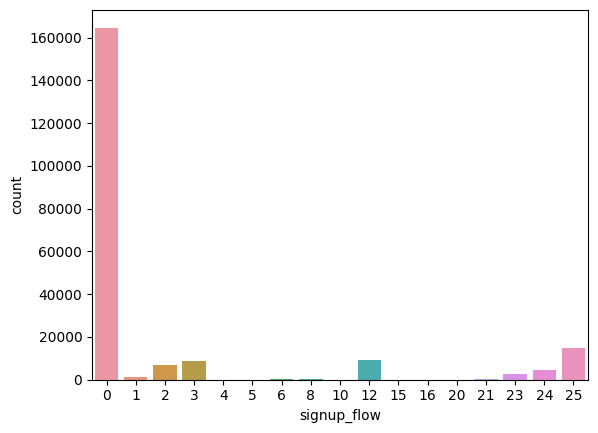

In [38]:
sns.countplot(x=train_users_df['signup_flow'])

### 3. Categorical variables

In [39]:
cat_variables = train_users_df.select_dtypes(include='object').columns.values
cat_variables

array(['id', 'gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'day_first_booking', 'month_first_booking'], dtype=object)

#### Gender

<Axes: xlabel='gender', ylabel='count'>

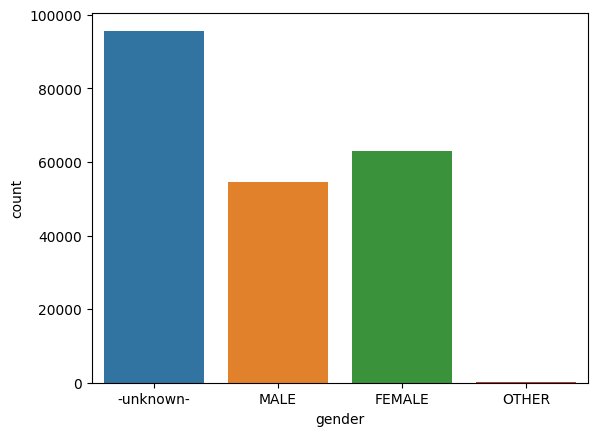

In [40]:
sns.countplot(x=train_users_df['gender'])

In [41]:
train_users_df['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [42]:
train_users_df['gender'].replace({'-unknown-':np.nan, 'FEMALE':'female', 'MALE':'male', 'OTHER':np.nan}, inplace=True)

In [43]:
train_users_df['gender'].isnull().sum()

95970

As we see, **`gender`** column has 95970 missing values, about **44.9%** of the dataset but **`gender`** is an important feature in prediction process so i will use **`miceforest`** to fill age column later.

<Axes: xlabel='gender', ylabel='count'>

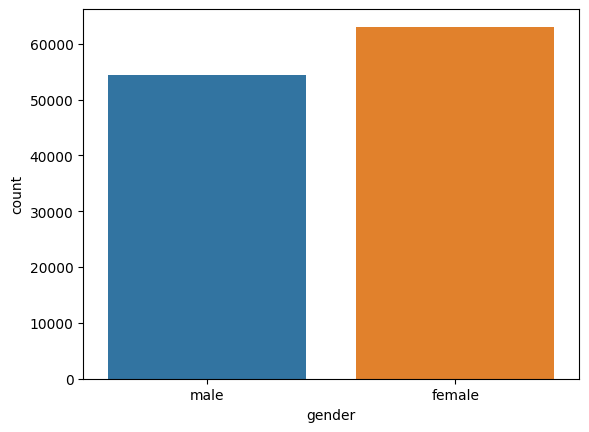

In [44]:
sns.countplot(x=train_users_df['gender'])

#### Signup method

<Axes: xlabel='signup_method', ylabel='count'>

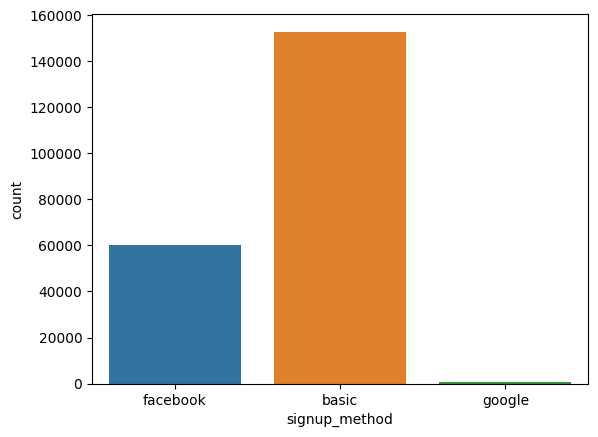

In [45]:
sns.countplot(x=train_users_df['signup_method'])

In [46]:
train_users_df['signup_method'].value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

#### Language

<Axes: xlabel='language', ylabel='count'>

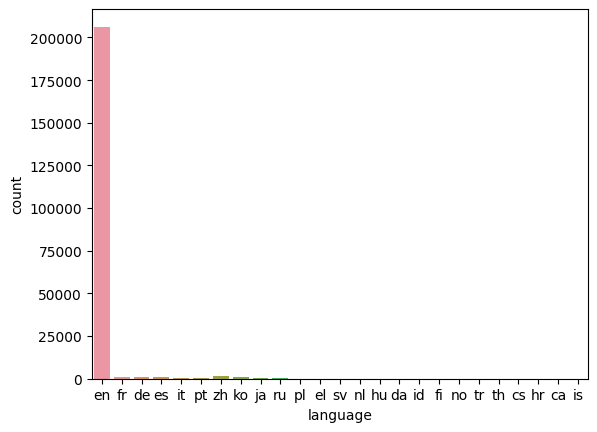

In [47]:
sns.countplot(x=train_users_df['language'])

In [48]:
train_users_df['language'].value_counts()[:5]

en    206314
zh      1632
fr      1172
es       915
ko       747
Name: language, dtype: int64

#### Affiliate channel

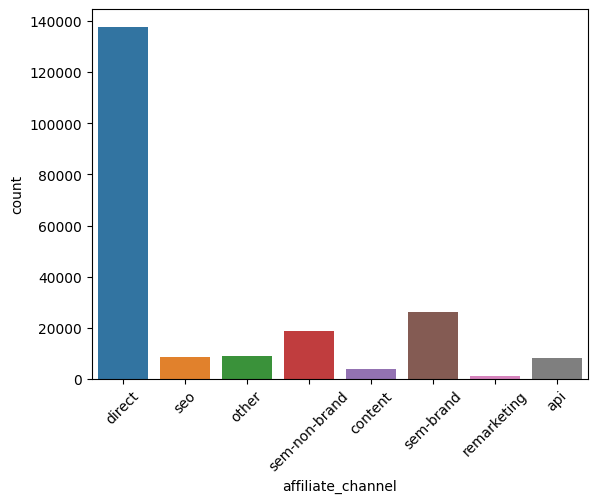

In [49]:
from pydantic.class_validators import root_validator
sns.countplot(x=train_users_df['affiliate_channel'])
plt.xticks(rotation=45);

In [50]:
train_users_df['affiliate_channel'].value_counts()

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

#### Affiliate provider

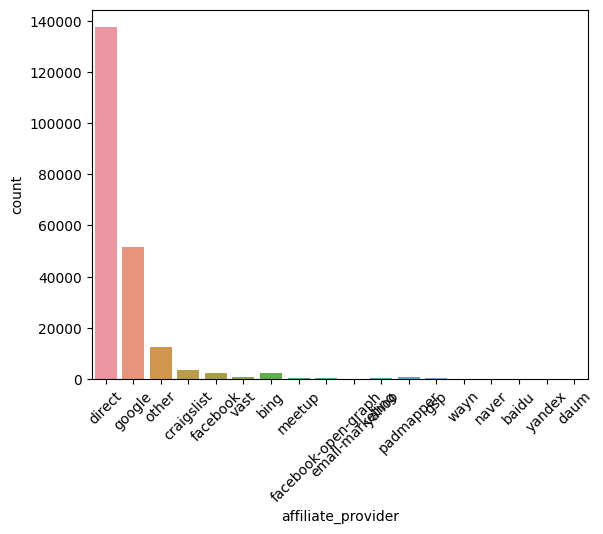

In [51]:
sns.countplot(x=train_users_df['affiliate_provider'])
plt.xticks(rotation=45);

In [52]:
train_users_df['affiliate_provider'].value_counts()[:5]

direct        137426
google         51693
other          12549
craigslist      3471
bing            2328
Name: affiliate_provider, dtype: int64

#### First affiliate tracked

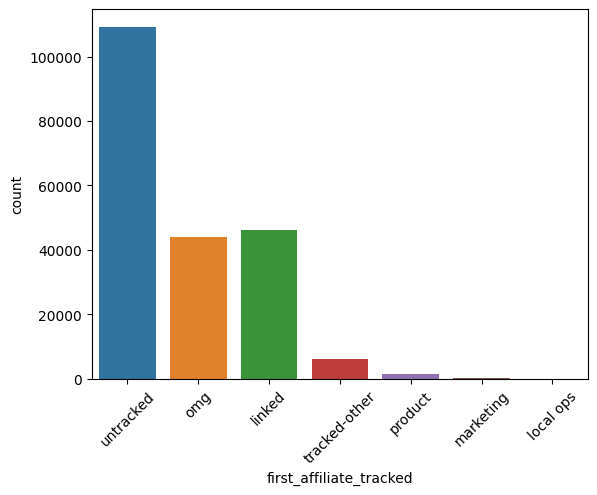

In [53]:
sns.countplot(x=train_users_df['first_affiliate_tracked'])
plt.xticks(rotation=45);

In [54]:
train_users_df['first_affiliate_tracked'].value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

#### Signup app

<Axes: xlabel='signup_app', ylabel='count'>

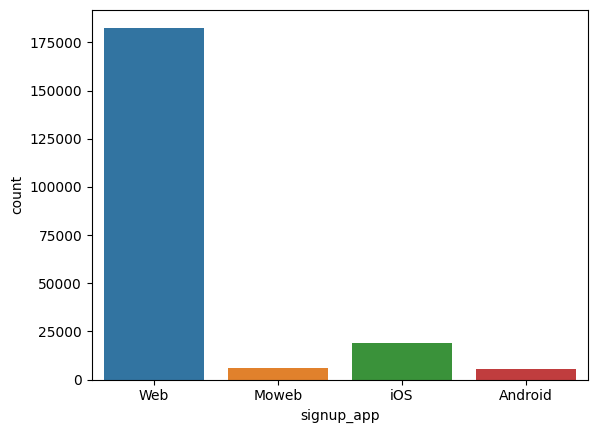

In [55]:
sns.countplot(x=train_users_df['signup_app'])

In [56]:
train_users_df['signup_app'].value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

#### First device type

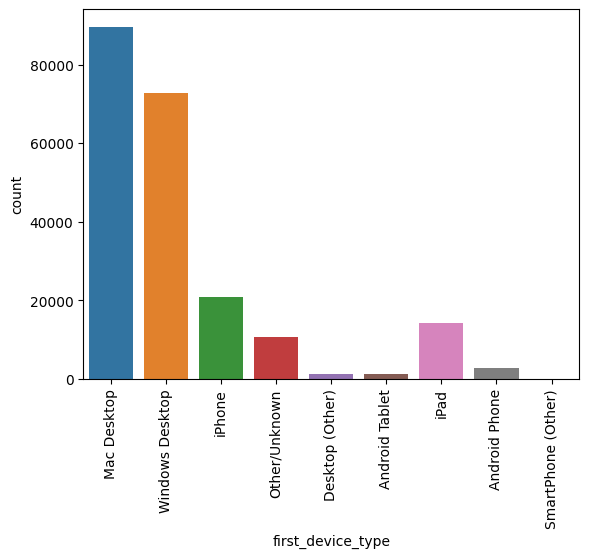

In [57]:
sns.countplot(x=train_users_df['first_device_type'])
plt.xticks(rotation=90);

In [58]:
train_users_df['first_device_type'].value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

#### First browser

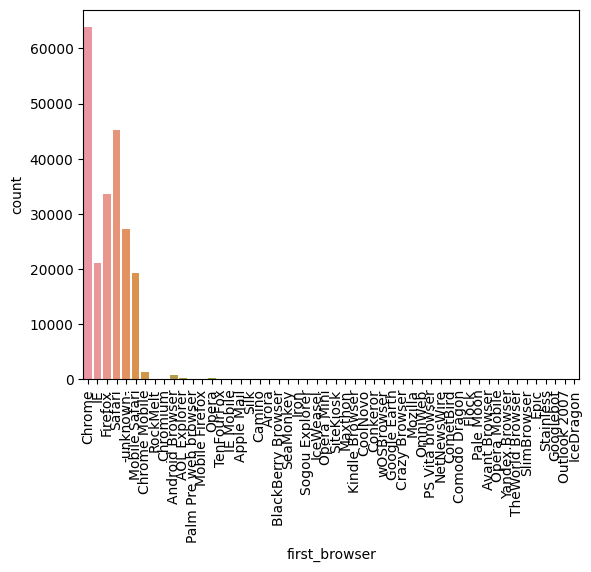

In [59]:
sns.countplot(x=train_users_df['first_browser'])
plt.xticks(rotation=90);

In [60]:
train_users_df['first_browser'].value_counts()[:10]

Chrome             63845
Safari             45169
Firefox            33655
-unknown-          27266
IE                 21068
Mobile Safari      19274
Chrome Mobile       1270
Android Browser      851
AOL Explorer         245
Opera                188
Name: first_browser, dtype: int64

#### Country destination

<Axes: xlabel='country_destination', ylabel='count'>

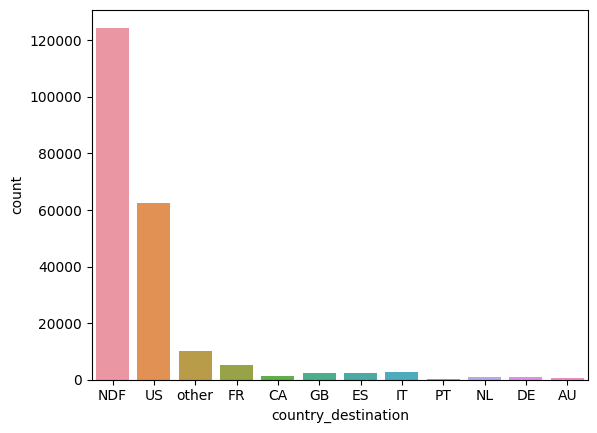

In [61]:
sns.countplot(x=train_users_df['country_destination'])

In [62]:
train_users_df['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

#### Data Imputation using `miceforest`

In [63]:
!pip install miceforest
import miceforest as mf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 443.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.8 MB/s eta 0:00:00


convert `object` columns to `category` type

In [64]:
train_users_df[train_users_df.select_dtypes(['object']).columns] = train_users_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [65]:
train_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'day_first_booking',
       'month_first_booking', 'hour_first_active'],
      dtype='object')

In [66]:
target_col = ['gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination']

remain_col = ['id', 'date_account_created', 'timestamp_first_active',
'date_first_booking']

In [67]:
rare_cat = ['id' ,'signup_flow', 'language',
            'affiliate_provider', 'first_affiliate_tracked', 'first_device_type',
            'first_browser', 'country_destination']

In [68]:
train_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  category      
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   117481 non-null  category      
 5   age                      123054 non-null  float64       
 6   signup_method            213451 non-null  category      
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  category      
 9   affiliate_channel        213451 non-null  category      
 10  affiliate_provider       213451 non-null  category      
 11  first_affiliate_tracked  207386 non-null  category      
 12  signup_app      

In [69]:
data = train_users_df[target_col]

In [70]:
data1 = train_users_df[target_col]

In [71]:
# Create kernel.
kernel = mf.ImputationKernel(
  data,
  save_all_iterations=True,
  random_state=1
)

# Printing the kernel will show you some high level information.
print(kernel)

# Run mice with our newly tuned parameters.
kernel.mice(2, n_estimators=50)

# Create completed dataset
completed_dataset = kernel.complete_data()

# Add imputed data to the original datasets
train_users_df[target_col] = completed_dataset

/usr/local/lib/python3.10/dist-packages/miceforest/ImputationKernel.py:371: UserWarning: [language,affiliate_provider,first_affiliate_tracked,first_device_type,first_browser,country_destination] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(



              Class: ImputationKernel
           Datasets: 1
         Iterations: 0
       Data Samples: 213451
       Data Columns: 12
  Imputed Variables: 3
save_all_iterations: True


In [72]:
train_users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
day_first_booking          124543
month_first_booking        124543
hour_first_active               0
dtype: int64

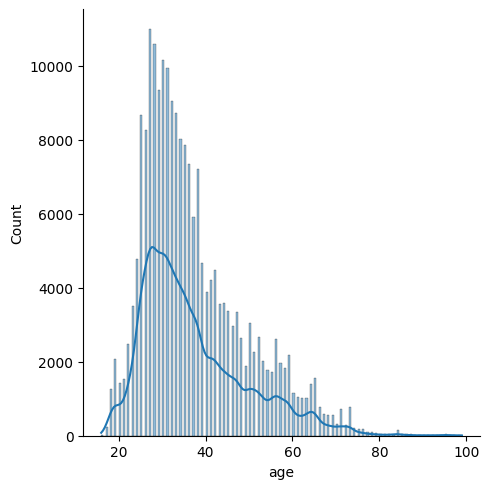

In [73]:
sns.displot(train_users_df['age'], kde=True)

I will use z-score method to nullify `age` outliers.

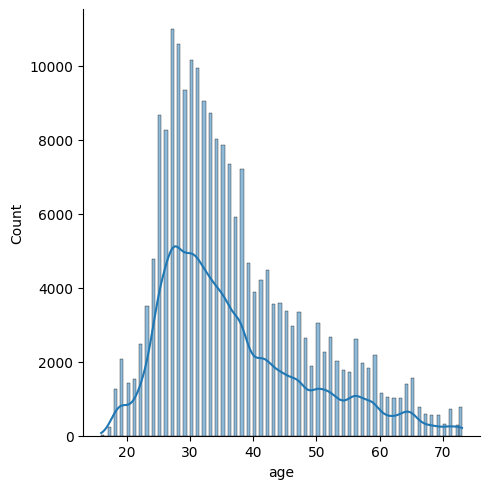

In [74]:
from scipy import stats
train_users_df['z_scores'] = stats.zscore(train_users_df['age'])
train_users_df['abs_z_scores'] = train_users_df['z_scores'].abs()
threshold = 3
train_users_df.loc[train_users_df['abs_z_scores'] > threshold, 'age'] = np.nan
sns.displot(train_users_df['age'], kde=True)

In [75]:
train_users_df.dropna(subset='age', axis=0, inplace=True)

In [76]:
train_users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         123511
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
day_first_booking          123511
month_first_booking        123511
hour_first_active               0
z_scores                        0
abs_z_scores                    0
dtype: int64

In [77]:
train_users_df['age'].describe()

count    211890.00
mean         36.85
std          11.60
min          16.00
25%          28.00
50%          34.00
75%          43.00
max          73.00
Name: age, dtype: float64

### Create cleaned train_users dataframe

In [78]:
train_users_df[train_users_df.select_dtypes(['category']).columns] = train_users_df.select_dtypes(['category']).apply(lambda x: x.astype('object'))

In [79]:
train_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211890 entries, 0 to 213450
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       211890 non-null  object        
 1   date_account_created     211890 non-null  datetime64[ns]
 2   timestamp_first_active   211890 non-null  datetime64[ns]
 3   date_first_booking       88379 non-null   datetime64[ns]
 4   gender                   211890 non-null  object        
 5   age                      211890 non-null  float64       
 6   signup_method            211890 non-null  object        
 7   signup_flow              211890 non-null  int64         
 8   language                 211890 non-null  object        
 9   affiliate_channel        211890 non-null  object        
 10  affiliate_provider       211890 non-null  object        
 11  first_affiliate_tracked  211890 non-null  object        
 12  signup_app      

In [80]:
train_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'day_first_booking',
       'month_first_booking', 'hour_first_active', 'z_scores', 'abs_z_scores'],
      dtype='object')

In [81]:
train_users_cleaned = train_users_df.drop(axis=1,
                                          columns=['day_first_booking', 'month_first_booking', 'hour_first_active','z_scores', 'abs_z_scores']).copy()
train_users_cleaned.head()

id date_account_created timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28    2009-03-19 04:32:55                NaT   
1  820tgsjxq7           2011-05-25    2009-05-23 17:48:09                NaT   
2  4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47         2010-08-02   
3  bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29         2012-09-08   
4  87mebub9p4           2010-09-14    2009-12-08 06:11:05         2010-02-18   

   gender   age signup_method  signup_flow language affiliate_channel  \
0  female  23.0      facebook            0       en            direct   
1    male  38.0      facebook            0       en               seo   
2  female  56.0         basic            3       en            direct   
3  female  42.0      facebook            0       en            direct   
4    male  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [82]:
train_users_cleaned.shape

(211890, 16)

In [83]:
train_users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211890 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       211890 non-null  object        
 1   date_account_created     211890 non-null  datetime64[ns]
 2   timestamp_first_active   211890 non-null  datetime64[ns]
 3   date_first_booking       88379 non-null   datetime64[ns]
 4   gender                   211890 non-null  object        
 5   age                      211890 non-null  float64       
 6   signup_method            211890 non-null  object        
 7   signup_flow              211890 non-null  int64         
 8   language                 211890 non-null  object        
 9   affiliate_channel        211890 non-null  object        
 10  affiliate_provider       211890 non-null  object        
 11  first_affiliate_tracked  211890 non-null  object        
 12  signup_app      

In [84]:
train_users_cleaned.to_csv('train_users_cleaned.csv')

#### 5. Test Users Dataset

In [85]:
test_users_df = test_users.copy()

In [86]:
test_users_df.head()

id date_account_created  timestamp_first_active  \
0  5uwns89zht           2014-07-01          20140701000006   
1  jtl0dijy2j           2014-07-01          20140701000051   
2  xx0ulgorjt           2014-07-01          20140701000148   
3  6c6puo6ix0           2014-07-01          20140701000215   
4  czqhjk3yfe           2014-07-01          20140701000305   

   date_first_booking     gender   age signup_method  signup_flow language  \
0                 NaN     FEMALE  35.0      facebook            0       en   
1                 NaN  -unknown-   NaN         basic            0       en   
2                 NaN  -unknown-   NaN         basic            0       en   
3                 NaN  -unknown-   NaN         basic            0       en   
4                 NaN  -unknown-   NaN         basic            0       en   

  affiliate_channel affiliate_provider first_affiliate_tracked signup_app  \
0            direct             direct               untracked      Moweb   
1            direct             direct               untracked      Moweb   
2            direct             direct                  linked        Web   
3            direct             direct                  linked        Web   
4            direct             direct               untracked        Web   

  first_device_type  first_browser  
0            iPhone  Mobile Safari  
1            iPhone  Mobile Safari  
2   Windows Desktop         Chrome  
3   Windows Desktop             IE  
4       Mac Desktop         Safari

In [87]:
test_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

In [88]:
test_users_df.shape

(62096, 15)

### Check for duplicates

In [89]:
test_users_df.duplicated().sum()

0

### Exploring the descriptive statistics of the variables

In [90]:
test_users_df.describe(include='all')

id date_account_created  timestamp_first_active  \
count        62096                62096                6.21e+04   
unique       62096                   92                     NaN   
top     5uwns89zht           2014-07-23                     NaN   
freq             1                 1105                     NaN   
mean           NaN                  NaN                2.01e+13   
std            NaN                  NaN                8.02e+07   
min            NaN                  NaN                2.01e+13   
25%            NaN                  NaN                2.01e+13   
50%            NaN                  NaN                2.01e+13   
75%            NaN                  NaN                2.01e+13   
max            NaN                  NaN                2.01e+13   

        date_first_booking     gender       age signup_method  signup_flow  \
count                  0.0      62096  33220.00         62096     62096.00   
unique                 NaN          4       NaN             4          NaN   
top                    NaN  -unknown-       NaN         basic          NaN   
freq                   NaN      33792       NaN         45325          NaN   
mean                   NaN        NaN     37.62           NaN         7.81   
std                    NaN        NaN     74.44           NaN        11.25   
min                    NaN        NaN      1.00           NaN         0.00   
25%                    NaN        NaN     26.00           NaN         0.00   
50%                    NaN        NaN     31.00           NaN         0.00   
75%                    NaN        NaN     40.00           NaN        23.00   
max                    NaN        NaN   2002.00           NaN        25.00   

       language affiliate_channel affiliate_provider first_affiliate_tracked  \
count     62096             62096              62096                   62076   
unique       24                 7                 17                       7   
top          en            direct             direct               untracked   
freq      59224             43844              43844                   33949   
mean        NaN               NaN                NaN                     NaN   
std         NaN               NaN                NaN                     NaN   
min         NaN               NaN                NaN                     NaN   
25%         NaN               NaN                NaN                     NaN   
50%         NaN               NaN                NaN                     NaN   
75%         NaN               NaN                NaN                     NaN   
max         NaN               NaN                NaN                     NaN   

       signup_app first_device_type first_browser  
count       62096             62096         62096  
unique          4                 9            31  
top           Web            iPhone     -unknown-  
freq        37201             19055         17128  
mean          NaN               NaN           NaN  
std           NaN               NaN           NaN  
min           NaN               NaN           NaN  
25%           NaN               NaN           NaN  
50%           NaN               NaN           NaN  
75%           NaN               NaN           NaN  
max           NaN               NaN           NaN

### Checking for missing values

In [91]:
test_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

## Exploring variables

In [92]:
test_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

### 1. Numerical variables

In [93]:
test_users_df.select_dtypes(exclude='object').columns

Index(['timestamp_first_active', 'date_first_booking', 'age', 'signup_flow'], dtype='object')

#### date_account_created, date_first_booking and timestamp_first_active
Convert `date_account_created`, `date_first_booking` and `timestamp_first_active` from `object` to `datetime` format

In [94]:
test_users_df['date_account_created'] = pd.to_datetime(test_users_df['date_account_created'], format='%Y-%m-%d')
test_users_df['date_first_booking'] = pd.to_datetime(test_users_df['date_first_booking'], format='%Y-%m-%d')
test_users_df['timestamp_first_active'] = pd.to_datetime(test_users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [95]:
test_users_df.select_dtypes(exclude='object').columns

Index(['date_account_created', 'timestamp_first_active', 'date_first_booking',
       'age', 'signup_flow'],
      dtype='object')

#### Age

In [96]:
test_users_df['age'].describe()

count    33220.00
mean        37.62
std         74.44
min          1.00
25%         26.00
50%         31.00
75%         40.00
max       2002.00
Name: age, dtype: float64

In [97]:
for i in range(test_users_df.shape[0]):
    if test_users_df.loc[i, 'age'] > 150:
        test_users_df.loc[i, 'age'] = test_users_df.loc[i, 'date_account_created'].year - test_users_df.loc[i, 'age']

In [98]:
test_users_df['age'][test_users_df['age'] > 150].unique()

array([], dtype=float64)

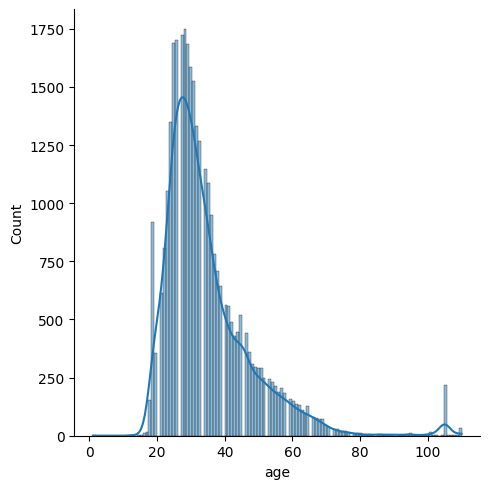

In [99]:
sns.displot(test_users_df['age'], kde=True)

In [100]:
test_users_df['age'].describe()

count    33220.00
mean        34.85
std         13.25
min          1.00
25%         26.00
50%         31.00
75%         40.00
max        110.00
Name: age, dtype: float64

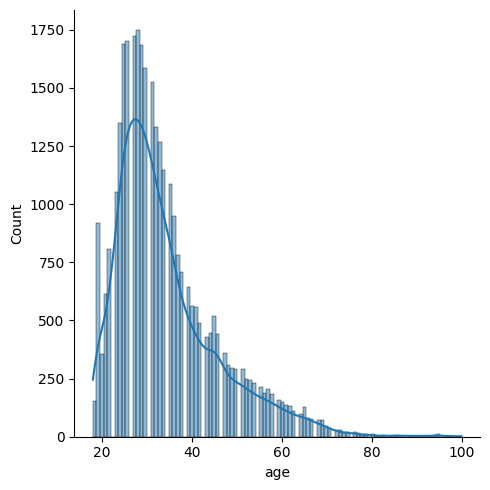

In [101]:
test_users_df.loc[test_users_df['age'] > 100, 'age'] = np.nan
test_users_df.loc[test_users_df['age'] < 18, 'age'] = np.nan
sns.displot(test_users_df['age'], kde=True)
plt.tight_layout()

In [102]:
test_users_df['age'].describe()

count    32887.00
mean        34.24
std         11.47
min         18.00
25%         26.00
50%         31.00
75%         39.00
max        100.00
Name: age, dtype: float64

In [103]:
test_users_df['age'].isnull().sum()

29209

As we see, **`age`** column has missing values, so i will use **`miceforest`** to fill age column later.

### 3. Categorical variables

In [104]:
cat_variables = test_users_df.select_dtypes(include='object').columns.values
cat_variables

array(['id', 'gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'], dtype=object)

#### Gender

<Axes: xlabel='gender', ylabel='count'>

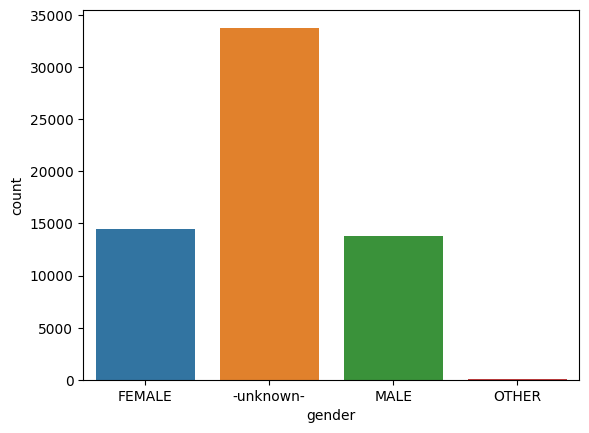

In [105]:
sns.countplot(x=test_users_df['gender'])

In [106]:
test_users_df['gender'].value_counts()

-unknown-    33792
FEMALE       14483
MALE         13769
OTHER           52
Name: gender, dtype: int64

In [107]:
test_users_df['gender'].replace({'-unknown-':np.nan, 'FEMALE':'female', 'MALE':'male', 'OTHER':np.nan}, inplace=True)

In [108]:
test_users_df['gender'].isnull().sum()

33844

As we see, **`gender`** column has 95970 missing values, about **44.9%** of the dataset but **`gender`** is an important feature in prediction process so i will use **`miceforest`** to fill age column later.

### Data Imputation using `miceforest` algorithm
#### convert `object` columns to `category` type

In [109]:
test_users_df[test_users_df.select_dtypes(['object']).columns] = test_users_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [110]:
test_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

In [111]:
test_target_col = ['gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser']

test_remain_col = ['id', 'date_account_created', 'timestamp_first_active',
'date_first_booking']

In [112]:
test_rare_cat = ['id' ,'signup_flow', 'language', 'affiliate_provider', 'first_affiliate_tracked',
            'first_device_type', 'first_browser', 'country_destination']

In [113]:
test_data = test_users_df[test_target_col]

In [114]:
# Create kernel.
test_kernel = mf.ImputationKernel(
  test_data,
  save_all_iterations=True,
  random_state=1
)

# Printing the kernel will show you some high level information.
print(test_kernel)

# Run mice with our newly tuned parameters.
test_kernel.mice(2, n_estimators=50)

# Create completed dataset
completed_dataset = test_kernel.complete_data()

# Add imputed data to the original datasets
test_users_df[test_target_col] = completed_dataset

/usr/local/lib/python3.10/dist-packages/miceforest/ImputationKernel.py:371: UserWarning: [signup_method,language,affiliate_provider,first_affiliate_tracked,first_device_type,first_browser] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(



              Class: ImputationKernel
           Datasets: 1
         Iterations: 0
       Data Samples: 62096
       Data Columns: 11
  Imputed Variables: 3
save_all_iterations: True


In [115]:
test_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

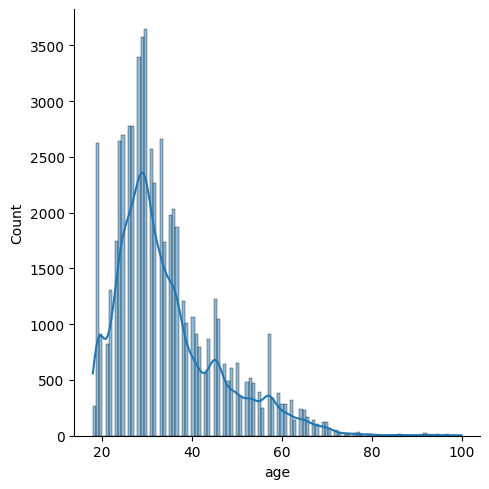

In [116]:
sns.displot(test_users_df['age'], kde=True)

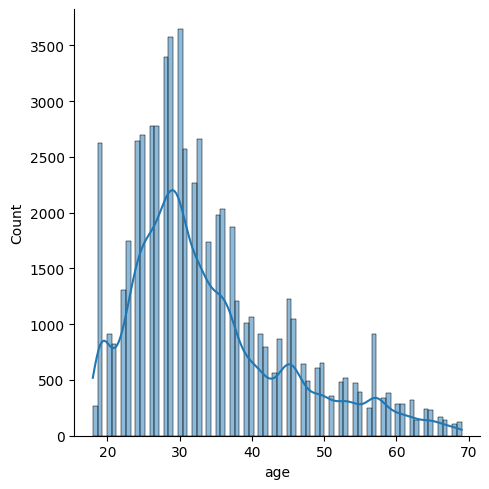

In [117]:
from scipy import stats
test_users_df['z_scores'] = stats.zscore(test_users_df['age'])
test_users_df['abs_z_scores'] = test_users_df['z_scores'].abs()
threshold = 3
test_users_df.loc[test_users_df['abs_z_scores'] > threshold, 'age'] = np.nan
sns.displot(test_users_df['age'], kde=True)

In [118]:
test_users_df.dropna(subset='age', axis=0, inplace=True)

In [119]:
test_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         61522
gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
z_scores                       0
abs_z_scores                   0
dtype: int64

In [120]:
test_users_df['age'].describe()

count    61522.00
mean        34.00
std         10.87
min         18.00
25%         26.00
50%         31.00
75%         39.00
max         69.00
Name: age, dtype: float64

### Create cleaned train_users dataframe

In [121]:
test_users_df[test_users_df.select_dtypes(['category']).columns] = test_users_df.select_dtypes(['category']).apply(lambda x: x.astype('object'))

In [122]:
#train_users_df[train_users_df.select_dtypes(['object']).columns] = train_users_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
#test_users_df[test_users_df.select_dtypes(['object']).columns] = test_users_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [123]:
test_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61522 entries, 0 to 62095
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       61522 non-null  object        
 1   date_account_created     61522 non-null  datetime64[ns]
 2   timestamp_first_active   61522 non-null  datetime64[ns]
 3   date_first_booking       0 non-null      datetime64[ns]
 4   gender                   61522 non-null  object        
 5   age                      61522 non-null  float64       
 6   signup_method            61522 non-null  object        
 7   signup_flow              61522 non-null  int64         
 8   language                 61522 non-null  object        
 9   affiliate_channel        61522 non-null  object        
 10  affiliate_provider       61522 non-null  object        
 11  first_affiliate_tracked  61522 non-null  object        
 12  signup_app               61522 n

In [124]:
test_users_df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'z_scores', 'abs_z_scores'],
      dtype='object')

In [125]:
test_users_cleaned = test_users_df.drop(axis=1, columns=['z_scores', 'abs_z_scores']).copy()
test_users_cleaned.head()

id date_account_created timestamp_first_active date_first_booking  \
0  5uwns89zht           2014-07-01    2014-07-01 00:00:06                NaT   
1  jtl0dijy2j           2014-07-01    2014-07-01 00:00:51                NaT   
2  xx0ulgorjt           2014-07-01    2014-07-01 00:01:48                NaT   
3  6c6puo6ix0           2014-07-01    2014-07-01 00:02:15                NaT   
4  czqhjk3yfe           2014-07-01    2014-07-01 00:03:05                NaT   

   gender   age signup_method  signup_flow language affiliate_channel  \
0  female  35.0      facebook            0       en            direct   
1  female  25.0         basic            0       en            direct   
2  female  30.0         basic            0       en            direct   
3    male  48.0         basic            0       en            direct   
4    male  46.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked      Moweb            iPhone   
1             direct               untracked      Moweb            iPhone   
2             direct                  linked        Web   Windows Desktop   
3             direct                  linked        Web   Windows Desktop   
4             direct               untracked        Web       Mac Desktop   

   first_browser  
0  Mobile Safari  
1  Mobile Safari  
2         Chrome  
3             IE  
4         Safari

In [126]:
test_users_cleaned.shape

(61522, 15)

In [127]:
test_users_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61522 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       61522 non-null  object        
 1   date_account_created     61522 non-null  datetime64[ns]
 2   timestamp_first_active   61522 non-null  datetime64[ns]
 3   date_first_booking       0 non-null      datetime64[ns]
 4   gender                   61522 non-null  object        
 5   age                      61522 non-null  float64       
 6   signup_method            61522 non-null  object        
 7   signup_flow              61522 non-null  int64         
 8   language                 61522 non-null  object        
 9   affiliate_channel        61522 non-null  object        
 10  affiliate_provider       61522 non-null  object        
 11  first_affiliate_tracked  61522 non-null  object        
 12  signup_app               61522 n

In [128]:
test_users_cleaned.to_csv('test_users_cleaned.csv')

##############################################################################################################################

### ML modelling

In [129]:
train_users_cleaned.head()

id date_account_created timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28    2009-03-19 04:32:55                NaT   
1  820tgsjxq7           2011-05-25    2009-05-23 17:48:09                NaT   
2  4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47         2010-08-02   
3  bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29         2012-09-08   
4  87mebub9p4           2010-09-14    2009-12-08 06:11:05         2010-02-18   

   gender   age signup_method  signup_flow language affiliate_channel  \
0  female  23.0      facebook            0       en            direct   
1    male  38.0      facebook            0       en               seo   
2  female  56.0         basic            3       en            direct   
3  female  42.0      facebook            0       en            direct   
4    male  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [130]:
X_train = train_users_cleaned.drop(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking'], axis=1).iloc[:, :-1]
y_train = train_users_cleaned.iloc[:, -1]

In [131]:
X_train.head()

gender   age signup_method  signup_flow language affiliate_channel  \
0  female  23.0      facebook            0       en            direct   
1    male  38.0      facebook            0       en               seo   
2  female  56.0         basic            3       en            direct   
3  female  42.0      facebook            0       en            direct   
4    male  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser  
0        Chrome  
1        Chrome  
2            IE  
3       Firefox  
4        Chrome

In [132]:
y_train.head()

0      NDF
1      NDF
2       US
3    other
4       US
Name: country_destination, dtype: object

In [133]:
test_users_cleaned.head()

id date_account_created timestamp_first_active date_first_booking  \
0  5uwns89zht           2014-07-01    2014-07-01 00:00:06                NaT   
1  jtl0dijy2j           2014-07-01    2014-07-01 00:00:51                NaT   
2  xx0ulgorjt           2014-07-01    2014-07-01 00:01:48                NaT   
3  6c6puo6ix0           2014-07-01    2014-07-01 00:02:15                NaT   
4  czqhjk3yfe           2014-07-01    2014-07-01 00:03:05                NaT   

   gender   age signup_method  signup_flow language affiliate_channel  \
0  female  35.0      facebook            0       en            direct   
1  female  25.0         basic            0       en            direct   
2  female  30.0         basic            0       en            direct   
3    male  48.0         basic            0       en            direct   
4    male  46.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked      Moweb            iPhone   
1             direct               untracked      Moweb            iPhone   
2             direct                  linked        Web   Windows Desktop   
3             direct                  linked        Web   Windows Desktop   
4             direct               untracked        Web       Mac Desktop   

   first_browser  
0  Mobile Safari  
1  Mobile Safari  
2         Chrome  
3             IE  
4         Safari

In [134]:
X_test = test_users_cleaned.drop(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking'], axis=1)

In [135]:
X_test.head()

gender   age signup_method  signup_flow language affiliate_channel  \
0  female  35.0      facebook            0       en            direct   
1  female  25.0         basic            0       en            direct   
2  female  30.0         basic            0       en            direct   
3    male  48.0         basic            0       en            direct   
4    male  46.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked      Moweb            iPhone   
1             direct               untracked      Moweb            iPhone   
2             direct                  linked        Web   Windows Desktop   
3             direct                  linked        Web   Windows Desktop   
4             direct               untracked        Web       Mac Desktop   

   first_browser  
0  Mobile Safari  
1  Mobile Safari  
2         Chrome  
3             IE  
4         Safari

### Concatenating X_train and X_test to perform OneHotEncoding

In [136]:
train_shape = X_train.shape[0]
train_shape

211890

In [137]:
X = pd.concat([X_train, X_test], ignore_index=True)
X.head()

gender   age signup_method  signup_flow language affiliate_channel  \
0  female  23.0      facebook            0       en            direct   
1    male  38.0      facebook            0       en               seo   
2  female  56.0         basic            3       en            direct   
3  female  42.0      facebook            0       en            direct   
4    male  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser  
0        Chrome  
1        Chrome  
2            IE  
3       Firefox  
4        Chrome

### One Hot Encoding

In [138]:
cat_cols = X.select_dtypes(include='object').columns
cat_cols

Index(['gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'],
      dtype='object')

In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), cat_cols)], remainder='passthrough')

In [140]:
X = ct.fit_transform(X)

In [141]:
#pd.DataFrame(X.toarray())
X

<273412x135 sparse matrix of type '<class 'numpy.float64'>'
	with 2803194 stored elements in Compressed Sparse Row format>

### Spliting X dataset to train set and test set

In [142]:
X_train = X[:train_shape, :]
X_test = X[train_shape:, :]

In [143]:
X_train.shape, X_test.shape

((211890, 135), (61522, 135))

### Spliting train dataset to train set and validation set

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

### Feature Scaling

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train[:, -2:] = sc.fit_transform(X_train[:, -2:])
X_val[:, -2:] = sc.fit_transform(X_val[:, -2:])
X_test[:, -2:] = sc.transform(X_test[:, -2:])

### Label Encoding

In [146]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)

## Training the XGBoost model on the Training set

In [147]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [148]:
y_pred = classifier.predict(X_val)
y_pred

array([7, 7, 7, ..., 7, 7, 7])

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = le.inverse_transform(y_pred)

In [150]:
#cm = confusion_matrix(le.inverse_transform(y_val), y_pred)
accuracy_score = accuracy_score(le.inverse_transform(y_val), y_pred)
print('Accuracy score = {:.2f} %'.format(accuracy_score*100))

Accuracy score = 61.55 %


In [151]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 61.72 %
Standard Deviation: 0.23 %


In [156]:
yhat = classifier.predict(X_test)
yhat = le.inverse_transform(yhat)
yhat

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['NDF', 'NDF', 'NDF', ..., 'NDF', 'NDF', 'NDF'], dtype=object)

## Training the  CatBoost model on the Training set

In [152]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.7 MB/s eta 0:00:00


In [153]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.102467
0:	learn: 2.0814504	total: 757ms	remaining: 12m 36s
1:	learn: 1.8756901	total: 1.16s	remaining: 9m 41s
2:	learn: 1.7323811	total: 2.69s	remaining: 14m 55s
3:	learn: 1.6268847	total: 5.32s	remaining: 22m 5s
4:	learn: 1.5451904	total: 7.85s	remaining: 26m 1s
5:	learn: 1.4804680	total: 9.02s	remaining: 24m 53s
6:	learn: 1.4273998	total: 9.89s	remaining: 23m 23s
7:	learn: 1.3835071	total: 10.8s	remaining: 22m 13s
8:	learn: 1.3475666	total: 11.4s	remaining: 20m 59s
9:	learn: 1.3176674	total: 12s	remaining: 19m 52s
10:	learn: 1.2915482	total: 12.7s	remaining: 19m 1s
11:	learn: 1.2691110	total: 13.3s	remaining: 18m 11s
12:	learn: 1.2497825	total: 13.9s	remaining: 17m 32s
13:	learn: 1.2334784	total: 14.5s	remaining: 16m 58s
14:	learn: 1.2192699	total: 15s	remaining: 16m 28s
15:	learn: 1.2073848	total: 15.7s	remaining: 16m 6s
16:	learn: 1.1969664	total: 16.4s	remaining: 15m 46s
17:	learn: 1.1881639	total: 17.2s	remaining: 15m 36s
18:	learn: 1.1800877	total: 17.9s	r

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_val).ravel()
#cm = confusion_matrix(y_val, y_pred)
#print(cm)
accuracy_score = accuracy_score(y_val, y_pred)
print('Accuracy score = {:.2f} %'.format(accuracy_score*100))

Accuracy score = 61.99 %


In [155]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
6:	learn: 1.4281831	total: 1.94s	remaining: 4m 35s
7:	learn: 1.3843133	total: 2.22s	remaining: 4m 35s
8:	learn: 1.3478935	total: 2.52s	remaining: 4m 37s
9:	learn: 1.3175142	total: 2.81s	remaining: 4m 37s
10:	learn: 1.2914160	total: 3.09s	remaining: 4m 37s
11:	learn: 1.2694177	total: 3.37s	remaining: 4m 37s
12:	learn: 1.2505619	total: 3.65s	remaining: 4m 37s
13:	learn: 1.2341512	total: 3.95s	remaining: 4m 38s
14:	learn: 1.2199481	total: 4.24s	remaining: 4m 38s
15:	learn: 1.2076875	total: 4.53s	remaining: 4m 38s
16:	learn: 1.1970277	total: 4.82s	remaining: 4m 38s
17:	learn: 1.1882117	total: 5.1s	remaining: 4m 38s
18:	learn: 1.1804847	total: 5.38s	remaining: 4m 37s
19:	learn: 1.1733475	total: 5.67s	remaining: 4m 37s
20:	learn: 1.1672665	total: 5.94s	remaining: 4m 37s
21:	learn: 1.1622331	total: 6.23s	remaining: 4m 36s
22:	learn: 1.1577571	total: 6.52s	remaining: 4m 36s
23:	learn: 1.1539504	total: 6.8s	remaining: 4m 36s
24:	learn: 1.150411